## Purpose: Decay 

Demonstration: 
    1. Linear Model
    2. Parameter fit
    3. Autoscaling, Chisq, Standard deviations
    4. Confidence region for the fit

Author: Do Kester


import classes

In [4]:
import numpy as numpy
import math

from ExpModel import ExpModel
from PolynomialModel import PolynomialModel
from PoissonErrorDistribution import PoissonErrorDistribution
from AmoebaFitter import AmoebaFitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt
from Tools import printclass

define some constants

In [5]:
N = 201
a = 17.8
b = -0.2

make a 3-degree polynomial

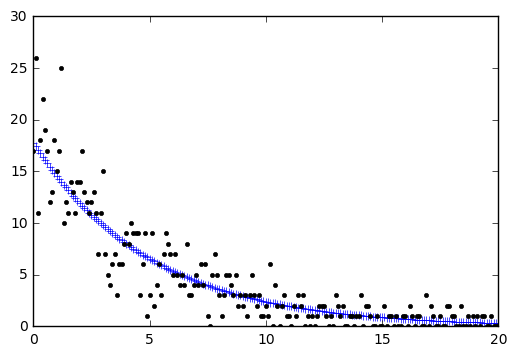

In [6]:
x = numpy.linspace( 0.0, 20.0, N, dtype=float )
ym = a * numpy.exp( b * x )

#y = ym + numpy.random.lognormal( ym, numpy.sqrt( ym ), N )
#y = numpy.asarray( y, dtype=int )
y = numpy.random.poisson( ym )
plotFit( x, y, truth=ym )

Define the model

In [7]:
mdl = ExpModel( )
print( mdl )


Exp: f( x:p ) = p_0 * exp( p_1 * x )


define the fitter: Fitter

In [8]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
 
# find the parameters
param = fitter.fit( y )

printclass( fitter )

+++++++++++++++++++++++++++++++++++++++++++++++++++++++
AmoebaFitter
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
chisq           357.985511779
errdis          poisson
fitIndex        None
fixedScale      None
imageAssistant  None
iter            36
keep            None
maxIter         1000
model           Exp: f( x:p ) = p_0 * exp( p_1 * x )
ndim            1
npfit           2
ntrans          73
nxdata          201
plotfreq        0
plotter         <IterationPlotter.IterationPlotter object at 0x10c2eaf60>
power           2.0
simplex         [[ 18.37473477  -0.20753694]  [ 18.36792794  -0.20739901]  [ 18.38340198  -0.20757247]  ]
tolerance       0.0001
tooLarge        100
values          [357.985511779  357.985534034  357.985521893  ]
verbose         1
xdata           [0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  ... ]


In [9]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [   18.375   -0.208]


AttributeError: 'NoneType' object has no attribute 'diagonal'

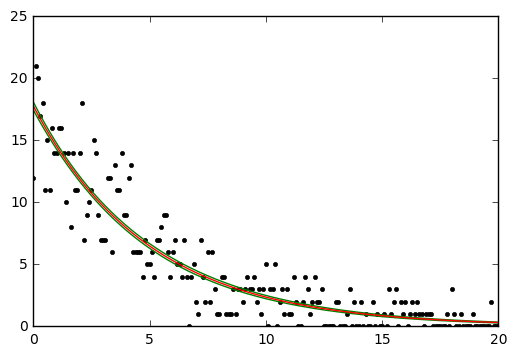

In [40]:
plotFit( x, y, mdl, ftr=fitter )

In [34]:
fitter = AmoebaFitter( x, mdl )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   17.550   -0.197]   709.101        27


In [35]:
fitter = AmoebaFitter( x, mdl, errdis="gauss" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   17.550   -0.197]   539.257        26


In [36]:
fitter = AmoebaFitter( x, mdl, errdis="laplace" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   18.074   -0.204]   421.127        36


In [37]:
fitter = AmoebaFitter( x, mdl, errdis="cauchy" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   18.313   -0.213]   427.485        22


In [33]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ))

[   17.787   -0.202]   356.023        21
